In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


**Question 1 :** Creation du dataset

In [45]:
data = pd.DataFrame({
    "TV": [230, 44, 17, 151, 180, 8, 57, 120, 8, 199],
    "Radio": [37, 39, 45, 41, 10, 35, 32, 28, 11, 33],
    "Journal": [69, 45, 69, 58, 21, 14, 23, 43, 6, 48],
    "Ventes": [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 5.3, 19.3]
})
data.head()

,TV,Radio,Journal,Ventes
0,230,37,69,22.1
1,44,39,45,10.4
2,17,45,69,9.3
3,151,41,58,18.5
4,180,10,21,12.9


**Question 2 :** visualisation des relations entre les variables

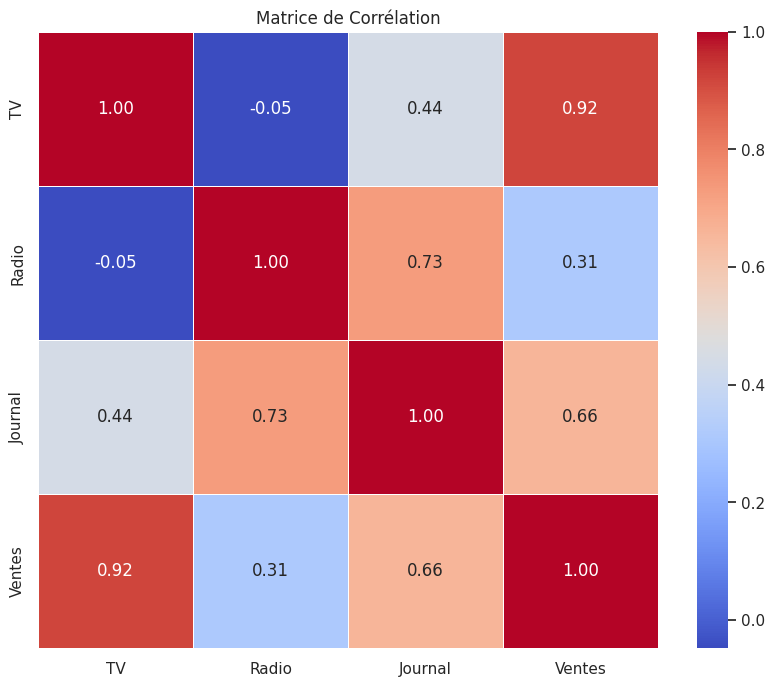

In [46]:
#creation d'une matrice de correlation
correlation = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show()

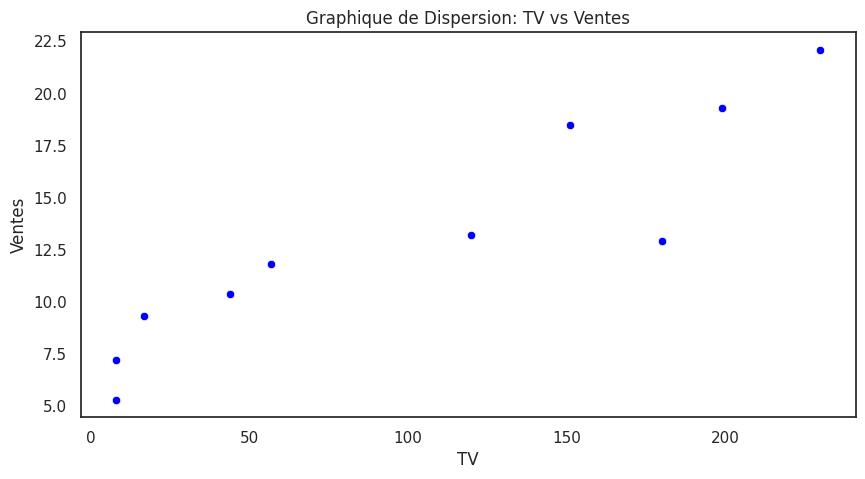

In [47]:
#je vais créer le graphique de dispersion
plt.figure(figsize=(10, 5))
sns.scatterplot(x='TV', y='Ventes', data=data, color='blue')
plt.title('Graphique de Dispersion: TV vs Ventes')
plt.xlabel('TV')
plt.ylabel('Ventes')
plt.show()

**Question 3 :** séparation des données X et Y

In [48]:
x = data[['TV', 'Radio', 'Journal']]
y = data['Ventes']

print("X (facteurs explicatifs) :")
print(x.head())

print("\nY (cible) :")
print(y.head())

X (facteurs explicatifs) :
    TV  Radio  Journal
0  230     37       69
1   44     39       45
2   17     45       69
3  151     41       58
4  180     10       21

Y (cible) :
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Ventes, dtype: float64


**Question 4 :** Division en ensemble d'entraînement et de test

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Vérification des tailles des ensembles
print(f"Ensemble d'entraînement : {X_train.shape[0]} échantillons")
print(f"Ensemble de test : {X_test.shape[0]} échantillons")

Ensemble d'entraînement : 8 échantillons
Ensemble de test : 2 échantillons


**Question 5 :** Entraînement du modèle de régression linéaire multiple

In [50]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

**Question 6 :** Affichage des coefficients du modèle

In [51]:
coef_tv = model.coef_[0]
coef_radio = model.coef_[1]
coef_journal = model.coef_[2]
intercept = model.intercept_

# Affichage de l'équation du modèle
print(f"Équation du modèle : Ventes = {coef_tv:.3f} × TV + {coef_radio:.3f} × Radio + {coef_journal:.3f} × Journal + {intercept:.3f}")


Équation du modèle : Ventes = 0.070 × TV + 0.273 × Radio + -0.036 × Journal + -1.423


**Question 7 :** prédictions sur l’ensemble de test

In [52]:
Y_pred = model.predict(X_test)

print("Ventes réelles :", list(Y_test[:5]))
print("Ventes prédites :", list(Y_pred[:5]))

Ventes réelles : [5.3, 10.4]
Ventes prédites : [1.915158519415343, 10.636288126995044]


**Question 8 :** Évaluation du modèle

In [53]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"MSE (Erreur Quadratique Moyenne) : {mse:.3f}")
print(f"Score R² : {r2:.3f}")

MSE (Erreur Quadratique Moyenne) : 5.756
Score R² : 0.115
